<a href="https://colab.research.google.com/github/fsndzomga/Deep-Learning-With-Python/blob/main/Keras_and_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

x = tf.ones(shape= (2,1))

print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2,1))

print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Random tensors

In [ ]:
x = tf.random.normal(shape=(3,1), mean=0.,stddev=1.)
print(x)

tf.Tensor(
[[-0.74668664]
 [-2.2556796 ]
 [ 1.3720987 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.5280297]
 [0.8989512]
 [0.8704363]], shape=(3, 1), dtype=float32)


In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.8243679 ],
       [ 0.55263275],
       [-1.474656  ]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
a = tf.ones((2,2))

b = tf.square(a)

c = tf.sqrt(a)

d = b + c

e = tf.matmul(a,b)

e *= d

In [ ]:
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
from numpy.lib.function_base import gradient
input_var = tf.Variable(initial_value=3.0)

with tf.GradientTape() as tape:
  result = tf.square(input_var)

gradient = tape.gradient(result, input_var)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
import numpy as np

num_samples_per_class = 1000

negative_sample = np.random.multivariate_normal(mean=[0,3],cov=[[1.0,0.5],[0.5,1.0]], size=num_samples_per_class)

positive_sample = np.random.multivariate_normal(mean=[3,0], cov=[[1.0,0.5],[0.5,1.0]], size=num_samples_per_class)

inputs = np.vstack((negative_sample, positive_sample)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class,1), dtype ="float32"),np.ones((num_samples_per_class,1),dtype="float32")))

Plotting data with matplotlib

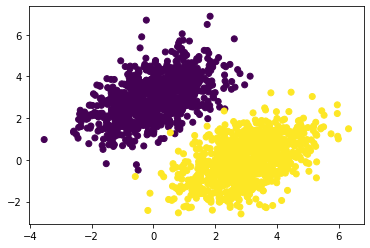

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])

plt.show()

Creating the linear classifier variables

In [ ]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value= tf.random.uniform(shape=(input_dim, output_dim)))

b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Forward pass function

In [ ]:
def model(inputs):
  return tf.matmul(inputs, W) + b


Mean squared error loss function

In [ ]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

Training step function

In [ ]:
from tensorflow.python.framework.auto_control_deps_utils import get_read_only_resource_input_indices_graph
learning_rate = 0.01

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W,grand_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grand_loss_wrt_b * learning_rate)
  
  return loss

Batch training loop

In [ ]:
for step in range(200):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.5991
Loss at step 1: 2.7307
Loss at step 2: 2.0817
Loss at step 3: 1.5964
Loss at step 4: 1.2334
Loss at step 5: 0.9617
Loss at step 6: 0.7581
Loss at step 7: 0.6055
Loss at step 8: 0.4910
Loss at step 9: 0.4049
Loss at step 10: 0.3401
Loss at step 11: 0.2912
Loss at step 12: 0.2543
Loss at step 13: 0.2263
Loss at step 14: 0.2050
Loss at step 15: 0.1888
Loss at step 16: 0.1763
Loss at step 17: 0.1667
Loss at step 18: 0.1591
Loss at step 19: 0.1532
Loss at step 20: 0.1485
Loss at step 21: 0.1447
Loss at step 22: 0.1416
Loss at step 23: 0.1391
Loss at step 24: 0.1369
Loss at step 25: 0.1350
Loss at step 26: 0.1334
Loss at step 27: 0.1319
Loss at step 28: 0.1306
Loss at step 29: 0.1294
Loss at step 30: 0.1282
Loss at step 31: 0.1271
Loss at step 32: 0.1261
Loss at step 33: 0.1251
Loss at step 34: 0.1242
Loss at step 35: 0.1232
Loss at step 36: 0.1223
Loss at step 37: 0.1215
Loss at step 38: 0.1206
Loss at step 39: 0.1197
Loss at step 40: 0.1189
Loss at step 41: 0.1181
Lo

Plotting how the linear model classifies our input

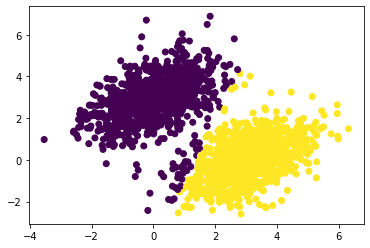

In [ ]:
predictions = model(inputs)

plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0]>0.5)

plt.show()

Plotting the line that separates the two classes

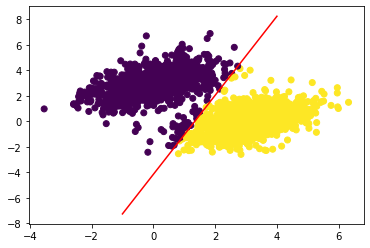

In [ ]:
x = np.linspace(-1,4,100)

y = -W[0]/W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, "-r")

plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0]>0.5)

plt.show()


Anatomy of a neural network: Understanding core Keras APIs

The fundamental data structure in neural networks is the layer.

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation
  
  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,), initializer = "zeros")
  
  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [ ]:
my_dense = SimpleDense(units = 32, activation = tf.nn.relu)

input_tensor = tf.ones(shape=(2, 784))

output_tensor = my_dense(input_tensor)

print(output_tensor.shape)

(2, 32)


In [1]:
import numpy as np

a = [5, 5, 3, 4, 5, 2, 5, 5, 2, 5, 3]


In [2]:
np.median(a)

5.0